#Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

#Carregando os dados

In [ ]:
df0 = pd.read_csv('/content/creditcard.csv', delimiter=',', on_bad_lines='skip')
df = df0.copy()

# Análise Exploratória Inicial dos Dados

In [ ]:
df.head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.tail(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
255477,157249.0,2.071461,0.060467,-1.796866,0.396267,0.397019,-0.812514,0.125288,-0.172778,0.652199,...,-0.381820,-1.057455,0.325926,0.352463,-0.273028,0.183866,-0.070660,-0.032893,8.93,0.0
255478,157249.0,-2.843548,-4.587778,0.818595,0.203997,4.177982,-2.484075,-3.123154,0.380996,-0.710725,...,-0.127588,-1.119557,1.192799,0.008392,-1.345231,0.253538,0.094165,0.352329,27.48,0.0
255479,157249.0,1.294649,1.221781,-2.361473,1.635577,1.159360,-0.780776,0.277586,-0.995896,-0.430455,...,0.890610,0.238838,-0.151908,-0.758297,0.388915,-0.319750,0.190831,0.176565,22.24,0.0
255480,157250.0,2.287623,-1.360279,-0.859147,-1.805292,-0.916506,0.196297,-1.352885,0.007933,-1.461890,...,-0.113544,0.224519,0.227297,0.233038,-0.203433,-0.199558,0.030439,-0.051695,6.00,0.0
255481,157250.0,0.225431,0.537650,-0.841347,-1.015495,1.310253,-0.800218,1.459744,-0.371294,0.023430,...,0.004810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,255482.000000,255482.000000,255482.000000,255482.000000,255482.000000,255482.000000,255482.000000,255482.000000,255482.000000,255482.000000,...,255482.000000,255481.000000,255481.000000,255481.000000,255481.000000,255481.000000,255481.000000,255481.000000,255481.000000,255481.000000
mean,86840.706445,-0.029635,-0.018393,0.083215,0.019853,-0.032304,0.015417,-0.013438,0.002223,0.000513,...,-0.001198,-0.008824,-0.004946,0.001003,0.017323,0.001137,-0.000646,0.000721,90.493516,0.001836
std,43525.613934,1.959489,1.665984,1.508606,1.416063,1.373488,1.325975,1.225678,1.190809,1.110333,...,0.736273,0.717978,0.634217,0.605839,0.516324,0.484908,0.401938,0.331046,250.935656,0.042806
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,50899.250000,-0.932640,-0.609350,-0.749180,-0.840605,-0.722714,-0.751315,-0.563839,-0.202610,-0.654038,...,-0.225632,-0.535241,-0.164388,-0.351127,-0.296713,-0.329572,-0.070650,-0.050983,5.990000,0.000000
50%,78446.500000,0.002953,0.059997,0.277678,0.008928,-0.089390,-0.254155,0.023533,0.027915,-0.057350,...,-0.030505,0.000802,-0.016894,0.044427,0.045961,-0.058342,0.002074,0.013452,22.990000,0.000000
75%,129339.000000,1.273878,0.783457,1.089082,0.786447,0.574073,0.417802,0.551058,0.330103,0.606624,...,0.178939,0.504070,0.138083,0.433657,0.362492,0.246942,0.089279,0.077764,79.500000,0.000000
max,157250.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


💬 Observação sobre a Variável `Class`

A variável **`Class`** apresenta uma **média de `0.0018`** e um **desvio padrão de `0.0428`**, o que indica um **forte desbalanceamento entre as classes**.

- A média próxima de zero sugere que **quase todas as amostras pertencem à classe 0**.
- A baixa variação (std) reforça que a **classe 1 ocorre muito raramente** no conjunto de dados.

Esse desbalanceamento pode influenciar negativamente o desempenho de modelos de classificação se não for tratado adequadamente.



In [ ]:
df.shape

(255482, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255482 entries, 0 to 255481
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    255482 non-null  float64
 1   V1      255482 non-null  float64
 2   V2      255482 non-null  float64
 3   V3      255482 non-null  float64
 4   V4      255482 non-null  float64
 5   V5      255482 non-null  float64
 6   V6      255482 non-null  float64
 7   V7      255482 non-null  float64
 8   V8      255482 non-null  float64
 9   V9      255482 non-null  float64
 10  V10     255482 non-null  float64
 11  V11     255482 non-null  float64
 12  V12     255482 non-null  float64
 13  V13     255482 non-null  float64
 14  V14     255482 non-null  float64
 15  V15     255482 non-null  float64
 16  V16     255482 non-null  float64
 17  V17     255482 non-null  float64
 18  V18     255482 non-null  float64
 19  V19     255482 non-null  float64
 20  V20     255482 non-null  float64
 21  V21     25

# Tratamento de Dados Duplicados

In [ ]:
df.duplicated().sum()

np.int64(949)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

# Tratamento de Valores Ausentes

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


# Distribuição das Classes

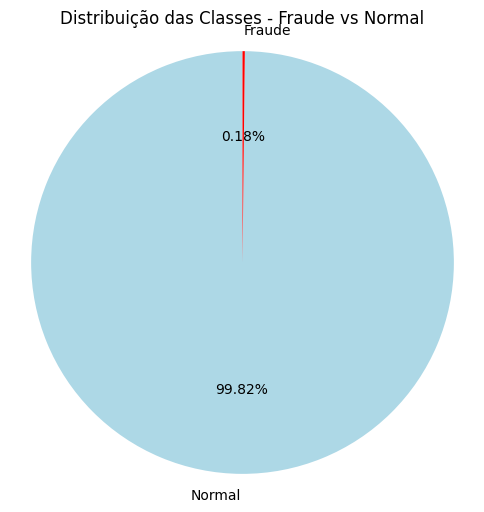

In [ ]:
class_counts = df['Class'].value_counts()

labels = ['Normal', 'Fraude']

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=labels, autopct='%1.2f%%', startangle=90, colors=['lightblue', 'red'])
plt.title('Distribuição das Classes - Fraude vs Normal')
plt.axis('equal')
plt.show()

# Distribuição dos Valores das Transações por Classe

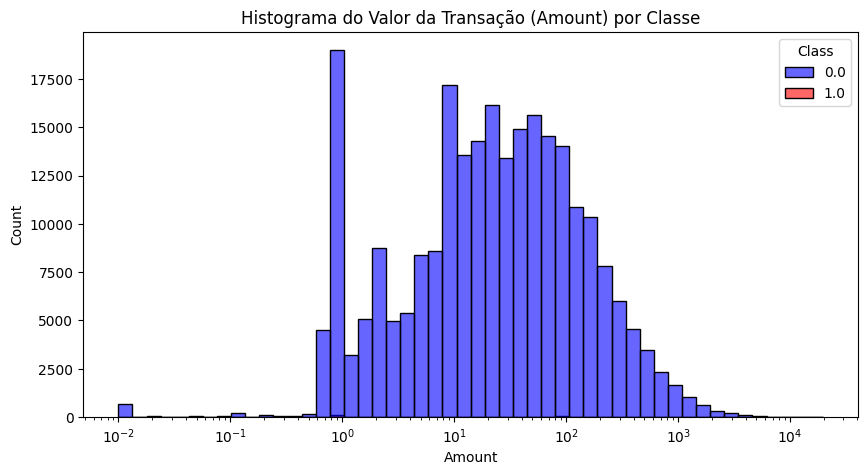

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='Amount', hue='Class', bins=50, log_scale=True, palette=['blue', 'red'], alpha=0.6)
plt.title('Histograma do Valor da Transação (Amount) por Classe')
plt.show()

# Boxplot do Valor das Transações por Classe

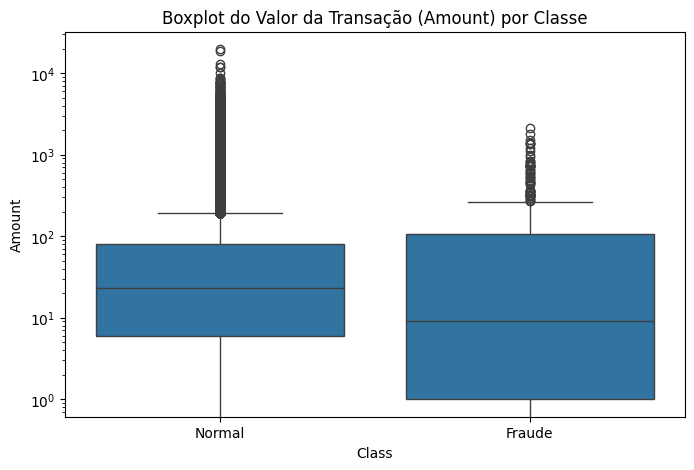

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.xticks([0,1], ['Normal', 'Fraude'])
plt.title('Boxplot do Valor da Transação (Amount) por Classe')
plt.show()

# Mapa de Correlação entre Variáveis

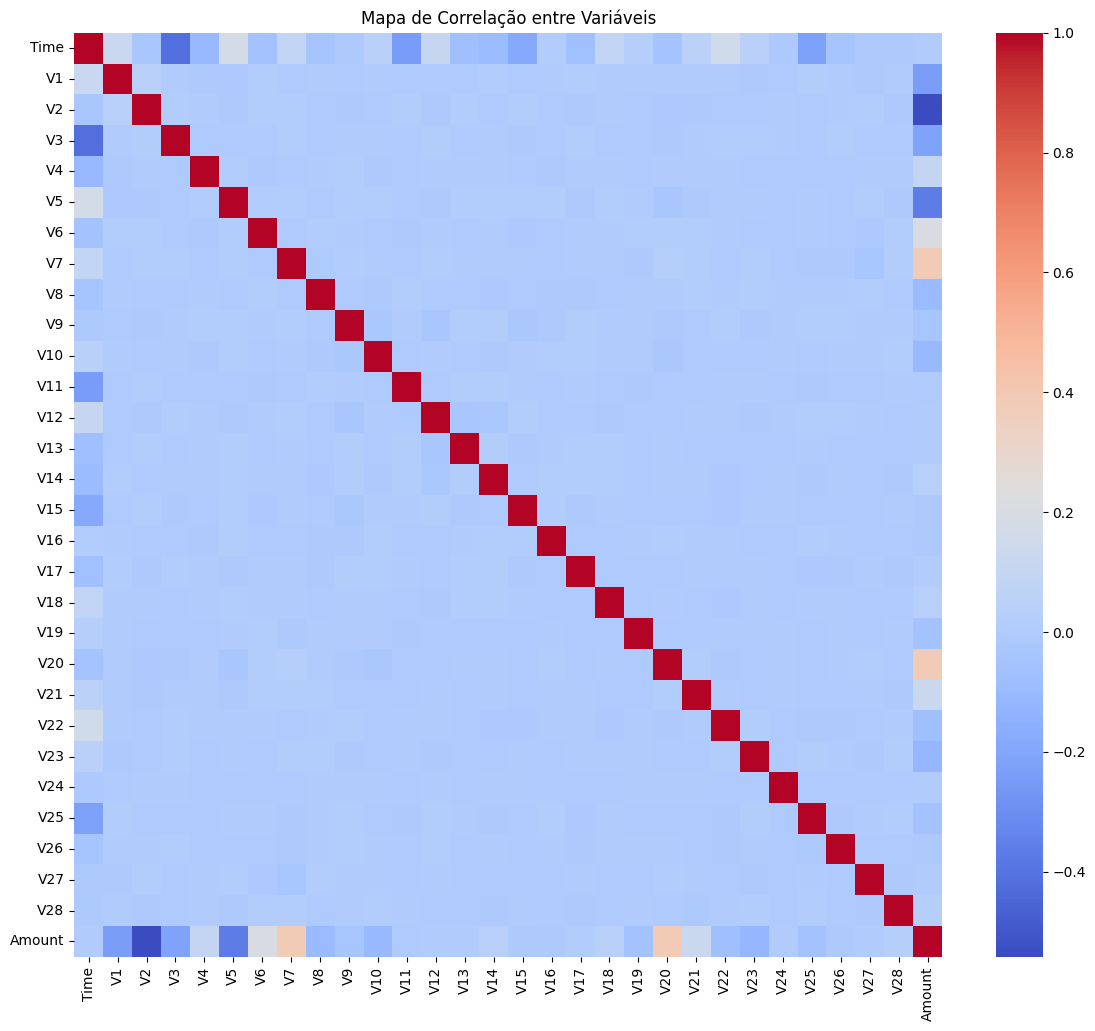

In [ ]:
plt.figure(figsize=(14,12))
corr = df.drop('Class', axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Mapa de Correlação entre Variáveis')
plt.show()

#  Identificação de Outliers no Valor das Transações

In [ ]:
outliers = df[df['Amount'] > df['Amount'].quantile(0.75)]
print(f"\nQuantidade de transações com Amount acima do 75º percentil: {len(outliers)}")


Quantidade de transações com Amount acima do 75º percentil: 63630


In [ ]:
outliers = df[df['Amount'] < df['Amount'].quantile(0.25)]
print(f"\nQuantidade de transações com Amount abaixo do 25º percentil: {len(outliers)}")


Quantidade de transações com Amount abaixo do 25º percentil: 63008


# Análise Temporal das Fraudes por Hora do Dia

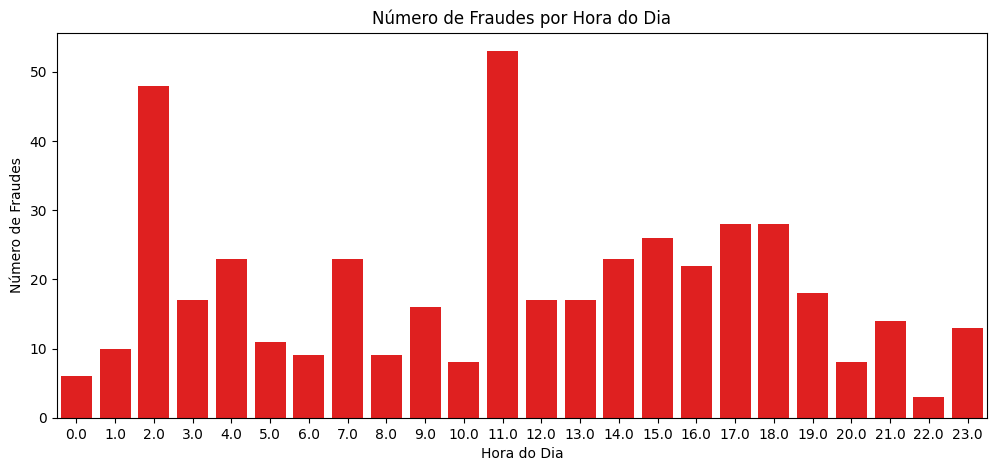

In [ ]:
df['Hour'] = (df['Time'] // 3600) % 24

plt.figure(figsize=(12,5))
sns.countplot(x='Hour', data=df[df['Class'] == 1], color='red')
plt.title('Número de Fraudes por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Fraudes')
plt.show()

# Análise Temporal das Transações Normais por Hora do Dia

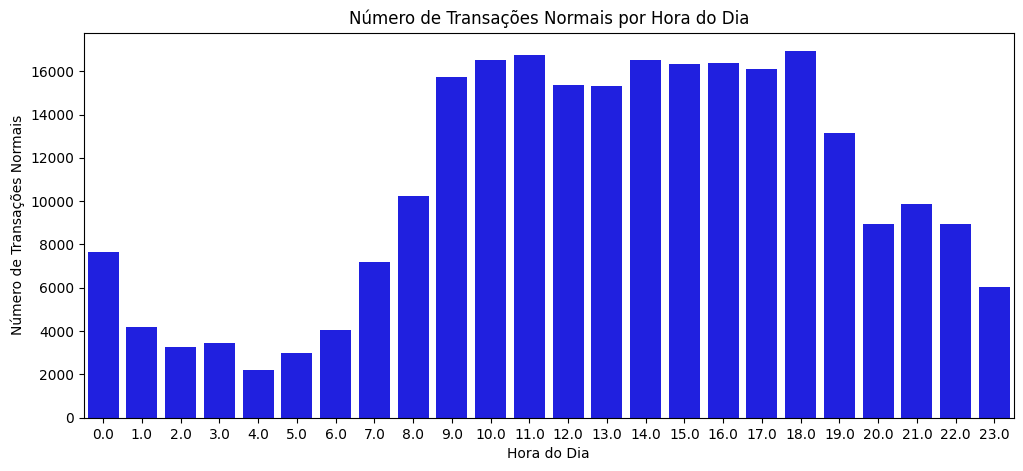

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='Hour', data=df[df['Class'] == 0], color='blue')
plt.title('Número de Transações Normais por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Transações Normais')
plt.show()

#Separação dos Dados em Conjunto de Treinamento e Teste

In [ ]:
class_counts = df['Class'].value_counts()
print(f"Transações Normais: {class_counts[0]}")
print(f"Transações Fraude: {class_counts[1]}")

Transações Normais: 254082
Transações Fraude: 450


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Balanceamento das Classes com SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

 Observação sobre o Balanceamento com SMOTE

Foi aplicado o método **SMOTE (Synthetic Minority Over-sampling Technique)** para balancear as classes no conjunto de treinamento.

- O SMOTE gera **novas amostras sintéticas** da classe minoritária (`Fraude`) com base na similaridade entre os dados existentes.
- Isso resulta em um conjunto de treinamento com **quantidade igual de amostras para cada classe**, o que ajuda o modelo a aprender melhor os padrões da classe minoritária.

>  Importante: O SMOTE foi aplicado **apenas no conjunto de treinamento**, preservando o conjunto de teste com a distribuição original, o que é essencial para uma avaliação realista do modelo.


#Treinamento do Modelo Random Forest

In [ ]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

# Avaliação do Modelo no Conjunto de Teste

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_proba)
print(f"AUC ROC: {auc:.4f}")

[[76209    16]
 [   25   110]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     76225
         1.0       0.87      0.81      0.84       135

    accuracy                           1.00     76360
   macro avg       0.94      0.91      0.92     76360
weighted avg       1.00      1.00      1.00     76360

AUC ROC: 0.9597


💬 Observação sobre os Resultados da Avaliação

O modelo Random Forest apresentou um desempenho muito bom no conjunto de teste, conforme indicado pela matriz de confusão e métricas principais:

- **Matriz de Confusão:** O modelo acertou 76.209 transações normais e 110 transações fraudulentas, com poucos falsos positivos (16) e falsos negativos (25).
- **Precisão da Classe Fraudulenta (1):** 87%, indicando que a maioria das transações previstas como fraude são realmente fraudes.
- **Recall da Classe Fraudulenta:** 81%, mostrando que o modelo identificou 81% das fraudes reais.
- **F1-Score:** 84% para a classe fraudulenta, balanceando precisão e recall.
- **Acurácia Global:** Quase 100%, embora essa métrica deva ser analisada com cautela devido ao desbalanceamento.
- **AUC ROC:** 0.96, evidenciando excelente capacidade do modelo em separar as classes.

Esses resultados indicam que o modelo é eficaz na detecção de fraudes, mas ainda pode ser aprimorado para reduzir os falsos negativos.


# Visualização da Matriz de Confusão

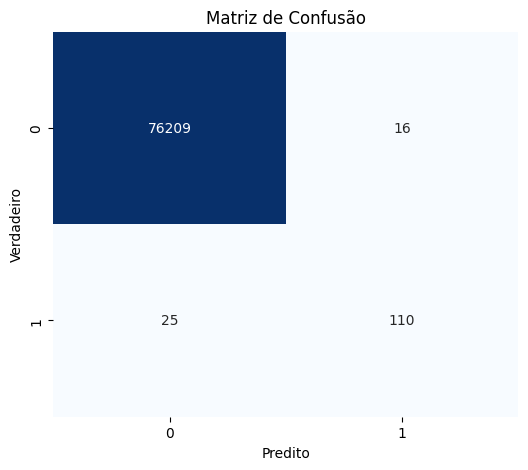

In [ ]:
# Calcula a matriz de confusão entre os valores reais e preditos
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


# Curva ROC (Receiver Operating Characteristic)

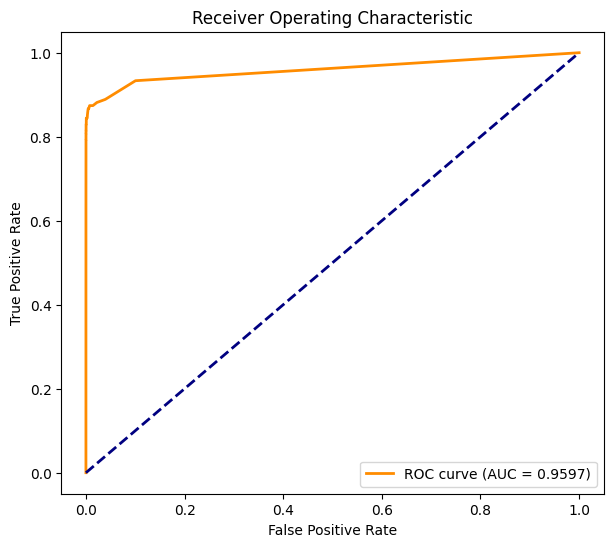

In [ ]:
# Calcula as taxas de falso positivo (fpr), verdadeiro positivo (tpr) e os thresholds para a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcula o valor da área sob a curva ROC (AUC)
roc_auc_value = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Curva Precision-Recall

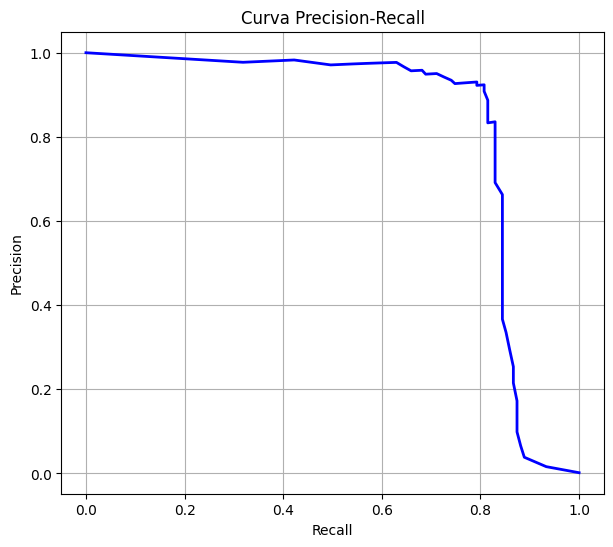

In [ ]:
# Calcula as métricas precision, recall e os thresholds correspondentes para diferentes pontos de corte
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(7,6))
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.grid(True)
plt.show()